## Linear Regression

I built a linear regression model with stochastic gradient descent using Python and numpy. At the end, an example with scikit-learn is used to confirm my results.

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [152]:
def cost(X, y, theta):
    '''Calculate value of the cost function for linear regression.'''
    m = X.shape[0]
    h = X.dot(theta)
    loss = h - y
    j = 1/(2*m) * np.dot(loss.T, loss)
    return round(j, 3)

In [153]:
def gradient_desc(X, y, theta, iters, alpha):
    '''Perform given # of iterations of gradient descent, starting with theta
    as a zero vector, to find optimal values of theta to minimize cost.
    '''
    cost_vals = []
    m = X.shape[0]
    for i in range(iters):
        h = X.dot(theta)
        loss = h - y                      # m x 1
        gradient = (X.T).dot(loss/m)      # n+1 x m dot m x 1 -> n+1 x 1
        theta = theta - alpha*gradient
        current_cost = cost(X, y, theta)
        cost_vals.append(current_cost)
    return theta, cost_vals

In [154]:
def normal_equation(X, y, theta):
    '''Calculate optimal theta values using normal equation.'''
    part1 = np.linalg.pinv((X.T).dot(X))
    part2 = (X.T).dot(y)
    return part1.dot(part2)

In [155]:
def predict(x, theta):
    '''Predict profit for single example of population and theta values.'''
    return round(np.array([1, x]).dot(theta), 2)

## Load and visualize data

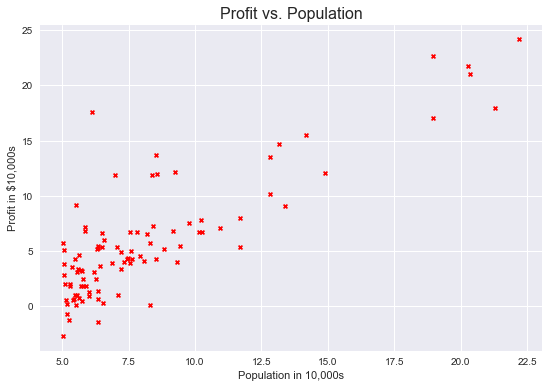

In [156]:
data = np.loadtxt(r'ex1data1.txt', delimiter=',')

# m rows of data, n features (not counting x0 column of 1s)
m = data.shape[0]
n = data[:,:-1].shape[1]

# Add x0 column of ones
data = np.column_stack((np.ones(m), data))
X = data[:,:2]
y = data[:,-1]

# Visualize dataset
fig, ax = plt.subplots(figsize=(9,6))
plt.scatter(X[:,1], y, color='red', s=15, marker='x')
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Profit vs. Population', fontsize=16)
plt.show()

## Initialize weights and hyperparameters

In [157]:
# Theta is a (n+1)x1 matrix where n = # of features, with 1 added for x0
theta = np.zeros(n+1)
alpha = 0.01
iterations = 1500

In [158]:
# Cost with initial zero weights.
j = cost(X, y, theta)
print('Initial cost\n{}'.format(j))

Initial cost
32.073


## Gradient Descent

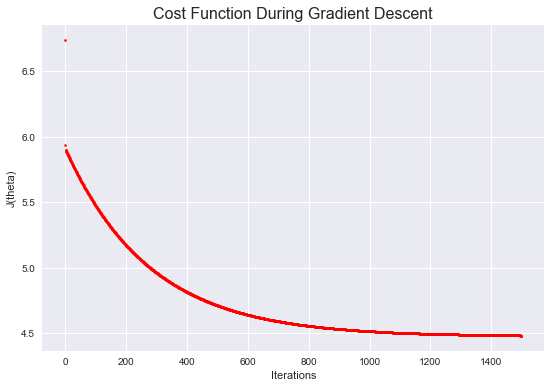

Theta values: 
[-3.63029144  1.16636235]

Cost: 
4.483


In [159]:
# Optimize theta using gradient descent.
theta_vals, cost_vals = gradient_desc(X, y, theta, iterations, alpha)

fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(list(range(len(cost_vals))), cost_vals, color='red', s=5)
plt.title('Cost Function During Gradient Descent', fontsize=16)
plt.xlabel('Iterations')
plt.ylabel('J(theta)')
plt.show()
print('Theta values: \n{}'.format(theta_vals))
print('\nCost: \n{}'.format(cost_vals[-1]))

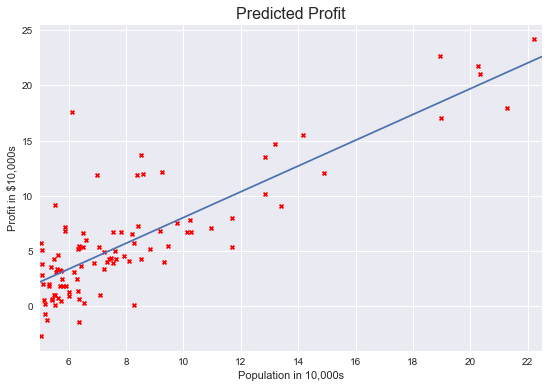

In [160]:
prediction_x_vals = [5.0, 22.5]
prediction_y_vals = [predict(i, theta_vals) for i in prediction_x_vals]

fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(X[:,1], y, color='red', s=15, marker='x')
ax.plot(prediction_x_vals, prediction_y_vals)
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.xlim(5, 22.5)
plt.title('Predicted Profit', fontsize=16)
plt.show()

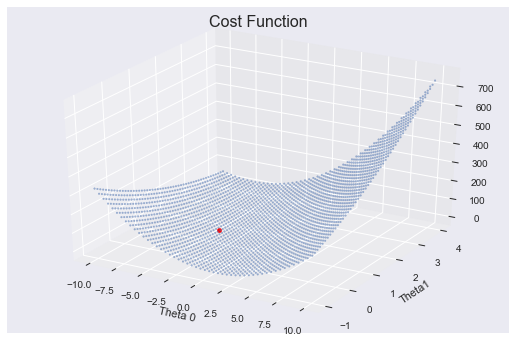

In [161]:
# Generate cost values for range of potential theta0 and theta1 values
theta0_vals = np.linspace(-10,10,50)
theta1_vals = np.linspace(-1,4,50)
x_3d, y_3d = np.meshgrid(theta0_vals, theta1_vals)
costs_3d = []
for i, xx in enumerate(x_3d):
    for j, yy in enumerate(y_3d):
        costs_3d.append(cost(X, y, [xx[i], yy[j]]))

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_3d, y_3d, costs_3d, alpha=0.5, s=3)
ax.scatter(theta_vals[0], theta_vals[1], cost_vals[-1], c='red')
plt.title('Cost Function', fontsize=16)
plt.xlabel('Theta 0')
plt.ylabel('Theta1')
plt.show()

In [162]:
print('Sample prediction: population of 65,000')
prediction = predict(65000, theta_vals)
print('Predicted profit: ${}'.format(prediction))

Sample prediction: population of 65,000
Predicted profit: $75809.92


# Normal Equation

Calculate weights with the normal equation instead of gradient descent.

In [163]:
normal_equation_weights = normal_equation(X, y, theta)
print('Normal Equation Weights\n{}'.format(normal_equation_weights))

Normal Equation Weights
[-3.89578088  1.19303364]


# scikit-learn Implementation

Create a comparable model with Pandas and scikit-learn.

In [164]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Load data and split into X and y sets.
df = pd.read_csv(r'ex1data1.txt', names=['Population', 'Profit'])
df.head()
X, y = df.iloc[:,:-1], df.iloc[:,-1]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, 
                                                    random_state=16)

In [165]:
# Create and train model.
lr = LinearRegression()
lr.fit(X_train, y_train)
mses = cross_val_score(lr, X_train, y_train, cv=4, 
                       scoring='neg_mean_squared_error')

theta0, theta1 = lr.intercept_, lr.coef_[0]
sample_prediction = lr.predict([[65000]])[0]

In [166]:
# Results
print('Theta values:\n{} {}'.format(theta0, theta1))
print('\nMean squared error:\n{}'.format(-np.mean(mses)))
print('\nPredicted profit for town with 65,000 people:\n${sample_prediction:.2f}'.format(round(sample_prediction, 2)))

Theta values:
-3.464927263790667 1.1376114041049026

Mean squared error:
9.797566500620846

Predicted profit for town with 65,000 people:
$73941.28
